In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [53]:
## Confirming that string is converted to list
df['job_skills'][1]

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']

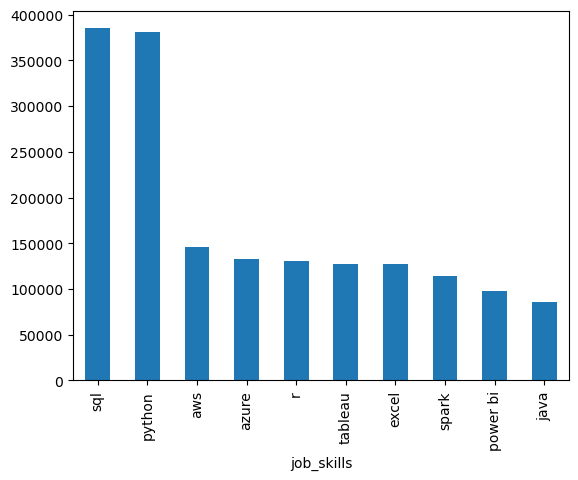

In [83]:
df_exploded = df.explode('job_skills')
## This will break individual skill in a individual Row as we can see below


df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()
## Here we are counting number of skills and then seeing top 10 skills and plotting them 
## as a bar graph below

In [55]:
## Now we want to group them by job title
df_exploded.groupby(['job_skills', 'job_title_short']).size()

## Continued Below... 1/2

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [56]:
df_exploded.groupby('job_title_short')['job_skills'].size()

job_title_short
Business Analyst              132832
Cloud Engineer                 46499
Data Analyst                  635832
Data Engineer                1133961
Data Scientist                799720
Machine Learning Engineer      77010
Senior Data Analyst           116917
Senior Data Engineer          314435
Senior Data Scientist         183963
Software Engineer             219114
Name: job_skills, dtype: int64

In [57]:
df_exploded.groupby('job_skills')['job_title_short'].size().sort_values(ascending=False).head(10)
## Does the same task as below
# df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
Name: job_title_short, dtype: int64

In [58]:
df_exploded['job_skills'].value_counts().head(10)

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
Name: count, dtype: int64

In [86]:
## Continued Below ..... 2/2



In [ ]:
df_exploded = df.explode('job_skills')
## This will break individual skill in a individual Row as we can see below


## Now we want to group them by job title, here we count the number of occurence of each skill for a specific job title
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
# skills_count = df_exploded.groupby('job_title_short')['job_skills'].size()

## Now this skills_count variable is saved as a series, we want it to convert to dataframe
df_skills_count = skills_count.reset_index(name='skill_count')


## Now we want to sort the dataframe by number of skills
df_skills_count = df_skills_count.sort_values(by = 'skill_count',ascending=False)


df_skills_count

,job_title_short,skill_count
3,Data Engineer,1133961
4,Data Scientist,799720
2,Data Analyst,635832
7,Senior Data Engineer,314435
9,Software Engineer,219114
8,Senior Data Scientist,183963
0,Business Analyst,132832
6,Senior Data Analyst,116917
5,Machine Learning Engineer,77010
1,Cloud Engineer,46499


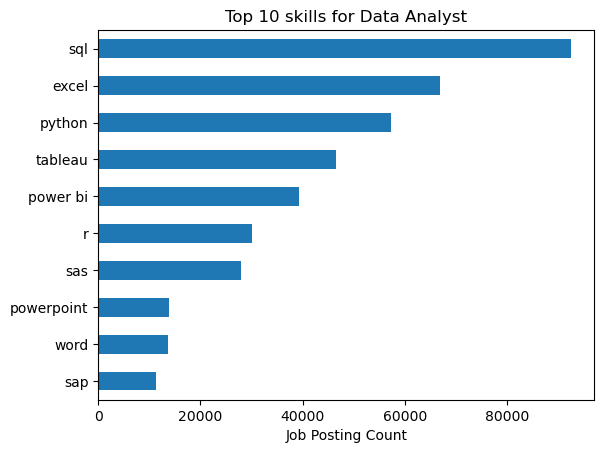

In [82]:
## Now we want to plot this for each Job title

job = 'Data Analyst'
top_skills = 10
df_skill_final = df_skills_count[df_skills_count['job_title_short']== job].head(top_skills)
# df_skill_final.plot(kind='bar', x='job_skills', y='skill_count')

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [94]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count


job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [93]:
skills_count = df_exploded.groupby('job_title_short')['job_skills'].size()
skills_count

job_title_short
Business Analyst              132832
Cloud Engineer                 46499
Data Analyst                  635832
Data Engineer                1133961
Data Scientist                799720
Machine Learning Engineer      77010
Senior Data Analyst           116917
Senior Data Engineer          314435
Senior Data Scientist         183963
Software Engineer             219114
Name: job_skills, dtype: int64